# Exploratory data analysis of the Disney Movies and Director Analysis

## Foreword

This notebook will be showing some exploratory data analysis for the `Disney Movies` dataset located [here](https://data.world/kgarrett/disney-character-success-00-16). Here I am analyzing the `Disney` dataset.For this project, we will be using 2 CSV files:`disney_movies_total_gross` and `disney_director`

# Introduction

## Question(s) of interests
In this analysis, I will be investigating set of following 2 questions:
1. Finding out the relationship between box office gross and genre in Disney
movies (in between the given number of years)
2. Director Analysis- Iam interested in finding the Disney movie directors with the most movies on the list,the number of movies each director has made in each genre and what is the  box office success rate for each director.

## Dataset description 

In this notebook, we will be analyzing a dataset of Disney movies to identify factors that contribute to their success. The Walt Disney Studios, which debuted with Snow White and the Seven Dwarfs in 1937, has produced over 600 films. While some of these films were box office hits, others were not. We will be exploring the dataset to gain insights into what makes a Disney movie successful and director's analysis by genre.

The disney dataset is composed of $5$ tables, `disney_characters.csv`, `disney_director.csv`, `disney_movies_total_gross.csv`, `disney_revenue_1991-2016.csv` and `disney_voice_actors.csv`. Each table is stored in a `.csv` file and contains different information about disney  movies including total gross, directors, voice-actors, characters and revenue. I will be using the `disney_movies_total_gross` and `disney_director` tables formally described below:

* **disney_movies_total_gross.csv**
    * This file contains information on `disney_movies_total_gross`, including the title of the movie, the date when the movie was released, the genre of the movie, the MPAA rating of the movie, the total gross and inflation-adjusted grossof the movie in dollars.
* **disney_director.csv**
    * This file contains information on `disney_director`,including the name of the movie and director's name

# Methods and Results

Since I am only interested in box office success rate and director's analysis, I will need to use tables that contain information on inflation adjusted gross and directors. This implies that I will need to use the **disney_director.csv** and the **disney_movies_total_gross.csv** files.

However, before moving further, let us import the tables and do some basic visualizations.

In [1]:
# Lets import all the required libraries needed for this analysis
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
from script import *

In [2]:
# import all the required files
gross = pd.read_csv('data/disney_movies_total_gross.csv',parse_dates=['release_date'])
direct = pd.read_csv('data/disney_director.csv')

Let's see how gross and directoe looks like:

In [3]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     562 non-null    object        
 3   MPAA_rating               523 non-null    object        
 4   total_gross               579 non-null    object        
 5   inflation_adjusted_gross  579 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 27.3+ KB


In [4]:
direct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      56 non-null     object
 1   director  56 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


## Transformation of Data (Data-Cleanup)

For cleaning the `gross` dataframe, we imported `clean_gross_data` function from `script.py` ,which takes a DataFrame df (gross) as input, cleans and processes the gross data and returns the cleaned DataFrame.The purpose of this function is to clean the data in the DataFrame df so that it can be used for analysis.

`clean_gross_data` performs the following actions:
* remove the dollar sign ($) from the beginning of the `inflation_adjusted_gross` and `total_gross` columns
* remove the commas (,) from the `inflation_adjusted_gross` and `total_gross` columns
* convert the `inflation_adjusted_gross` and `total_gross` columns from type string to type float
* extracts the year from the `release_date` column and creates a new column `release_year`
* removes any rows that have a missing value in the `genre` column

Similarly, we defined `clean_dir_data` which cleans the `disney_director.csv`. This function renames the `name` column  in the given dataframe to `movie_title` which helps in merge operation of `disney_director` and `disney_movies_total_gross`

### Applying `black` formatting rules to the code in script.py

In [5]:
!black script.py

All done! \u2728 \U0001f370 \u2728
1 file left unchanged.


Let's see how `clean_gross_data` works on `gross`

In [6]:
# cleaned gross dataframe is stored as gross_df
gross_df = clean_gross_data(gross)

In [7]:
gross_df.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485.0,5.228953e+09,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000.0,2.188229e+09,1940
2,Fantasia,1940-11-13,Musical,G,83320000.0,2.187091e+09,1940
3,Song of the South,1946-11-12,Adventure,G,65000000.0,1.078511e+09,1946
4,Cinderella,1950-02-15,Drama,G,85000000.0,9.206087e+08,1950


In [8]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 578
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               513 non-null    object        
 1   release_date              513 non-null    datetime64[ns]
 2   genre                     513 non-null    object        
 3   MPAA_rating               513 non-null    object        
 4   total_gross               513 non-null    float64       
 5   inflation_adjusted_gross  513 non-null    float64       
 6   release_year              513 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.1+ KB


## Top 10 Movies at Box Office

As a first step, i would like to find the top 10 highest grossing movies of all time, adjusted for inflation from `gross_df`. For this, iam sorting the movies by `inflation_adjusted_gross` and displaying the last ten rows as `top_ten_movies`

In [9]:
# Sort the movies in ascending order by 'inflation_adjusted_gross'
inf_gross_df = gross_df.sort_values('inflation_adjusted_gross').reset_index(drop=True)
# Last Ten rows represent the movies with highest 'inflation_adjusted_gross'
top_ten_movies = inf_gross_df.tail(10)

#### Top Ten-Movies at Box Office

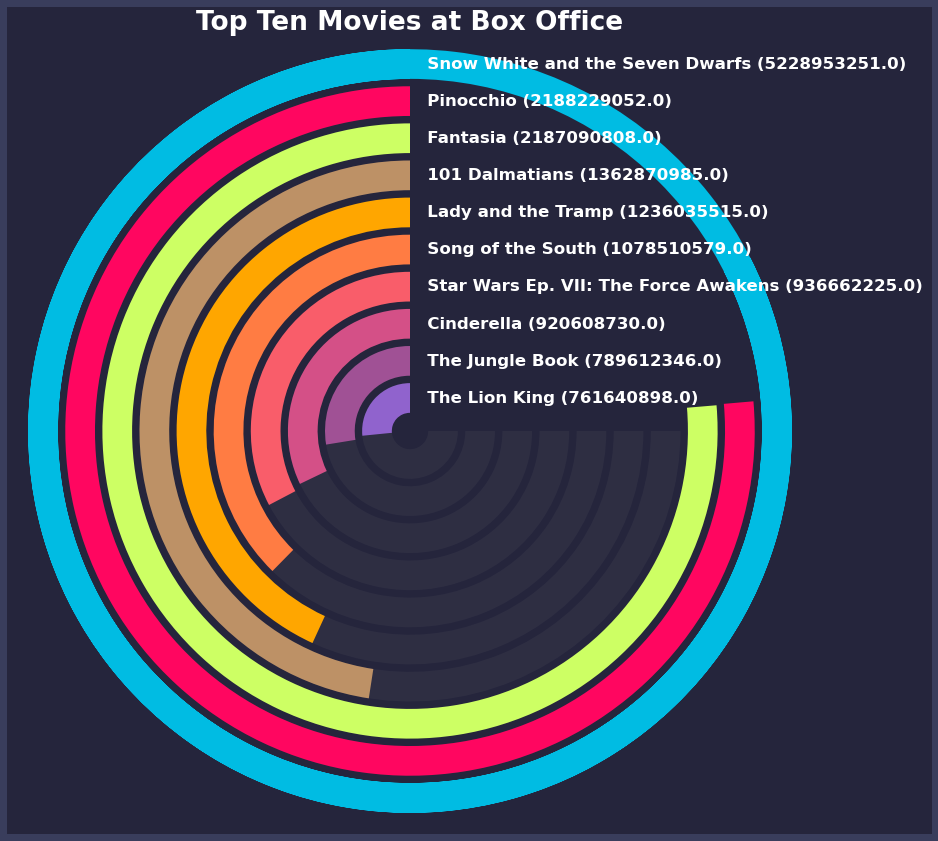

In [10]:
max_value_full_ring = max(top_ten_movies['inflation_adjusted_gross'])
data_len = len(top_ten_movies)

ring_colours=['#9063CD', '#a05195','#d45087','#f95d6a','#ff7c43','#ffa600','#BD9166','#cdff64','#ff0660','#00BCE3']
ring_labels = [f'   {x} ({v}) ' for x, v in zip(list(top_ten_movies['movie_title']), 
                                                 list(top_ten_movies['inflation_adjusted_gross']))]
data_len = len(top_ten_movies)

# Begin creating the figure
fig = plt.figure(figsize=(10,10), linewidth=10,
                 edgecolor='#393d5c', 
                 facecolor='#25253c')

rect = [0.1,0.1,0.8,0.8]
# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey
# ring to create the background for each one
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring*1.5*np.pi/max_value_full_ring, 
                     color='gray', 
                     alpha=0.1)
# Hide all axis items
ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_title("Top Ten Movies at Box Office",
                   fontsize=19, fontweight='bold',
                   color='White', verticalalignment='center')

ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6,7,8,9], 
                    labels=ring_labels, 
                    angle=0, 
                    fontsize=12, fontweight='bold',
                    color='White', verticalalignment='center')

# Loop through each entry in the dataframe and create a coloured 
# ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(top_ten_movies['inflation_adjusted_gross'])[i]*3.65*np.pi/max_value_full_ring, 
                  color=ring_colours[i])


# Hide all grid elements for the    
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False, 
                   labelbottom=False, labelleft=True)

plt.show()

# Box Office success by Genre(in between given years)

For this, we defined the function `genre_year_range` in `script.py` which takes in three parameters `start_year`, `end_year`, and `gross_df`, filters the `gross_df` by the release year between start_year and end_year (inclusive), groups the filtered DataFrame by `movie title`, `genre`, and `release year`, and computes the mean gross revenue for each group.

In [11]:
genre_year_success=genre_year_range(1996,2016, gross_df)

Let's create an Altair bar chart visualizing the `inflation-adjusted gross` revenue of movies by `release year` (in the given range of years) and `genre`.

In [12]:
inflation_gross_chart = alt.Chart(genre_year_success).mark_bar().encode(
    x=alt.X('release_year',title='Release Year'),
    y=alt.Y('inflation_adjusted_gross',title='Inflation_Gross($)'),
    color='genre'
).properties(width=700,
    height=300,title="Year-Wise Inflation Adjusted Gross")
inflation_gross_chart

alt.Chart(...)

## Director-Analysis

In [13]:
# cleaned director dataframe is stored as dir_df
dir_df = clean_dir_data(direct)
#Finding the number of unique values in the 'director' column of the DataFrame 'dir_df
dir_df['director'].unique().shape

(30,)

The following code implements `chaining`,which is merging two dataframes `dir_df` and `gross_df` on the common column `movie_title` using a right join.Here, the `gross_df` is the right DataFrame and the `dir_df` is the left DataFrame. Therefore, the resultant DataFrame will have all the rows from the `gross_df` and only the matching rows from the `dir_df`.
This code also performs the following operations after the right merge:
* Group the merged DataFrame by director and genre.
* Aggregate the movie_title column using the count function and rename the resultant column as num_movies.
* Sort the resultant DataFrame by the director column in descending order and reset the index.

The resulting dataframe, `gross_dir_merge_df`, contains information about the number of movies directed by each director in each genre.

In [14]:
gross_dir_merge_df = pd.merge(dir_df,gross_df,on='movie_title',how = 'right')\
                            .groupby(['director','genre'],as_index=False)\
                            .agg(total_movies =('movie_title','count'))\
                            .sort_values(by='director', ascending=False).reset_index(drop=True)
print("\n Director and Genre Analysis\n")
print(gross_dir_merge_df.to_string(index=False))


 Director and Genre Analysis

           director     genre  total_movies
Wolfgang Reitherman   Musical             2
Wolfgang Reitherman    Comedy             2
Wolfgang Reitherman Adventure             2
          Will Finn    Comedy             1
    Wilfred Jackson     Drama             2
Stephen J. Anderson Adventure             2
       Ron Clements    Comedy             1
       Ron Clements Adventure             5
       Roger Allers Adventure             1
      Robert Walker Adventure             1
         Rich Moore Adventure             1
       Ralph Zondag Adventure             1
       Nathan Greno Adventure             1
       Mike Gabriel Adventure             2
        Mark Dindal Adventure             2
          Joe Grant   Musical             1
     Hamilton Luske     Drama             1
    George Scribner Adventure             1
     Gary Trousdale   Musical             1
     Gary Trousdale Adventure             2
           Don Hall Adventure             1
 

Let's create a horizontal bar chart using Altair where the `x-axis` shows the `director` names, the `y-axis` shows the `total_movies` directed by each director, and the bars are colored according to the `genre` of the movie.

In [15]:
dir_by_genre = alt.Chart(gross_dir_merge_df).mark_bar().encode(
    x=alt.X('director',title="Director_Name",sort='-y', axis=alt.Axis(titleColor='steelblue')),
    y=alt.Y('total_movies',title='Total No. of Movies', axis=alt.Axis(titleColor='steelblue')),
    color='genre'
).properties(
    width=800,
    height=400,
    title=
    {
        'text':'Director Analysis: Number of Movies Directed by each Director',
        'fontSize': 16,
        'fontWeight': 'bold',
        'color': 'steelblue'
    }
)

dir_by_genre

alt.Chart(...)

Let's represent the same classification using `pivot`. Here, i applied `pivot` on the `gross_dir_merge_df` DataFrame based on the `director` and `genre` columns, creating a new DataFrame called `pivot_dir_df`. The values in the new DataFrame contain the number of movies done by each director in each genre.The pivot table is then manipulated to add a new column called `Movies_count` that contains the total number of movies directed by each director across all genres, and the rows are sorted in descending order based on this count.

In [16]:
pivot_dir_df = gross_dir_merge_df.pivot(index='director', columns='genre', values='total_movies').fillna(0)
pivot_dir_df['Movies_count'] = pivot_dir_df.sum(axis=1)
pivot_dir_df = pivot_dir_df.sort_values(by='Movies_count', ascending=False)
print("\nDirector and Genre-wise Analysis\n")
pivot_dir_df


Director and Genre-wise Analysis



genre,Adventure,Comedy,Drama,Musical,Movies_count
director,,,,,
Wolfgang Reitherman,2.0,2.0,0.0,2.0,6.0
Ron Clements,5.0,1.0,0.0,0.0,6.0
Gary Trousdale,2.0,0.0,0.0,1.0,3.0
Mike Gabriel,2.0,0.0,0.0,0.0,2.0
Chris Buck,2.0,0.0,0.0,0.0,2.0
Wilfred Jackson,0.0,0.0,2.0,0.0,2.0
Stephen J. Anderson,2.0,0.0,0.0,0.0,2.0
Mark Dindal,2.0,0.0,0.0,0.0,2.0
Will Finn,0.0,1.0,0.0,0.0,1.0


## Box-Office Success for Directors
Let's merge the `dir_df` and `gross_df` on movie_title and keeps only the rows with non-null values for `genre `and `inflation_adjusted_gross`. Then, we grouped the resulting dataframe by director and calculated the sum of `inflation_adjusted_gross` for each director(contains the total inflation_adjusted_gross acheieved by each director in the given set). Finally, it sorts the dataframe in descending order by the `inflation_adjusted_gross`.

In [17]:
dir_gross_df = pd.merge(dir_df, gross_df[['movie_title', 'genre', 'inflation_adjusted_gross']], on='movie_title', how='left')
dir_gross_df = dir_gross_df.dropna(subset=['genre', 'inflation_adjusted_gross'])
dir_gross_total = dir_gross_df.groupby('director')['inflation_adjusted_gross'].sum().reset_index()
dir_gross_total = dir_gross_total.sort_values('inflation_adjusted_gross', ascending=False).reset_index(drop=True)
dir_gross_total

,director,inflation_adjusted_gross
0,David Hand,5.228953e+09
1,Wolfgang Reitherman,3.119305e+09
2,Ben Sharpsteen,2.188229e+09
3,Joe Grant,2.187091e+09
4,Ron Clements,1.265312e+09
5,Hamilton Luske,1.236036e+09
6,Wilfred Jackson,1.121760e+09
7,Roger Allers,7.616409e+08
8,Chris Buck,6.988974e+08
9,Gary Trousdale,6.791946e+08


Let's create a horizontal bar chart using Altair where the `x-axis` shows the `director name`, the `y-axis` shows the `inflation_adjusted_gross` by each obtained director, and the bars are colored according to the `genre` of the movies.

In [18]:
dir_gross_chart = alt.Chart(dir_gross_df).mark_bar().encode(
    x=alt.X('director',title="Director name"),
    y=alt.Y('inflation_adjusted_gross',title='Inflation Adjusted Gross($)'),
    color='genre'
).properties(
    width=800,
    height=400,
    title='Total Box Office Collections by Director'
)
dir_gross_chart

alt.Chart(...)

# Discussion

From `inflation_gross_chart`(1937-2016),it's interesting to note that the `musical` genre was initially the highest grossing genre in terms of `inflation-adjusted gross`, but over time, the `adventure` genre surpassed it and became the most successful genre at the box office.This could be due to a variety of factors, such as changes in audience preferences, advances in technology that allowed for more visually stunning adventure films.

#### Director-Analysis:

It's interesting to note that Wolfgang Reitherman has achieved box office success across multiple genres, including `adventure`, `musical`, and other genres, making him a multi-faceted director. Additionally, he ranks second in terms of `inflation-adjusted gross`, which further highlights his success.

On the other hand, David Hand has only directed one movie that has achieved significant box office success. While this movie may have been a `musical`, it's hard to draw any conclusions about his specialization in this genre based on only one film. It's possible that he was a one-time exception or that he had success in other genres that are not included in the given data.

while box office success is one metric of a director's success, it's important to also consider critical acclaim, audience reception, and other factors that contribute to a director's overall legacy.

## Impact of Director-Analysis
The success of certain genres and directors could inform investment and production decisions. For example, as the "adventure" genre is currently the most successful at the box office, studios and producers may prioritize funding and producing adventure films over other genres in order to maximize profits. Similarly, the directors  who are consistently successful at the box office, would be more in demand and command higher salaries for future projects.

In addition to the questions I previously mentioned, here are a few more questions that i would like to  explore using `disney_director.csv`,`disney_movies_total_gross.csv` and `disney-characters.csv`:
* How does the `MPAA_rating` of a movie impact its box office success? Are there certain ratings that are more likely to lead to success at the box office?
* What is the highest-grossing character in terms of box office collections, and how do `hero` and `villain` characters compare in terms of their box office success?

# References

* https://data.world/kgarrett/disney-character-success-00-16
* https://en.wikipedia.org/wiki/Fantasia_(1940_film) (replaced the director column)
* https://github.com/duncandam86/DataCamp-Projects/blob/master/Disney%20Movies%20and%20Box%20Office%20Success/notebook.ipynb
* https://medium.com/towards-data-science/create-eye-catching-radial-bar-charts-with-matplotlib-fd03ff732048
* https://data.world/kgarrett/disney-character-success-00-16